In [1]:
import pandas as pd
import geopandas as gp
import pber_functions_v1 as pber

# Tangipahoa Elections

In [2]:
tre_17 = pd.read_csv("./raw-from-source/tangipahoa/tangi - tre_2017.csv")
sos_18 = pd.read_csv("./raw-from-source/tangipahoa/tangi_2018r_sos.csv")
gen_19 = pd.read_csv("./raw-from-source/tangipahoa/tangi_2019.csv")
gen_20 = pd.read_csv("./raw-from-source/tangipahoa/tangi_2020_potus.csv")
gov_23 = pd.read_csv("./raw-from-source/tangipahoa/tangi - gov_2023.csv")


# Convert the 18, and 20 files to short format

In [3]:
sos_18["Cand_Comb"] = sos_18["candidate"] + "-:-" + sos_18["party"]
sos_18_pivot = pd.pivot_table(sos_18, index = "precinct", columns = "Cand_Comb", values = "votes")
sos_18_pivot.reset_index(inplace = True, drop = False)

In [4]:
gen_20["Cand_Comb"] = gen_20["candidate"] + "-:-" + gen_20["party"]
gen_20_pivot = pd.pivot_table(gen_20, index = "precinct", columns = "Cand_Comb", values = "votes")
gen_20_pivot.reset_index(inplace = True, drop = False)

In [5]:
print(tre_17.shape)
print(sos_18_pivot.shape)
print(gen_19.shape)
print(gen_20_pivot.shape)
print(gov_23.shape)

(85, 3)
(85, 10)
(88, 8)
(87, 13)
(75, 16)


# Get Data Files
- Note: No 17 or 23 files, will try to use ones around the same time

In [6]:
la_17 = gp.read_file("./raw-from-source/boundaries/2017LouisianaPrecinctShapefile.zip")
la_18 = gp.read_file("./raw-from-source/boundaries/la_2018.zip")
la_19 = gp.read_file("./raw-from-source/boundaries/la_2019.zip")
la_20 = gp.read_file("./raw-from-source/boundaries/la_2020.zip")
la_22 = gp.read_file("./raw-from-source/boundaries/la_gen_2022_prec/la_gen_2022_prec.shp")

In [7]:
la_17 = la_17[la_17["COUNTYFP10"]=="105"]

In [8]:
la_18 = la_18[la_18["COUNTYFP10"]=="105"]
la_18.shape

(85, 16)

In [9]:
la_19 = la_19[la_19['COUNTYFP']=='105']
la_19.shape

(88, 33)

In [10]:
la_20 = la_20[la_20['COUNTYFP']=='105']
la_20.shape

(88, 25)

In [11]:
la_22 = la_22[la_22['COUNTYFP']=='105']
la_22.shape

(99, 62)

# Joins

## 2017

In [12]:
tre_17.columns

Index(['Precinct', 'Derrick Edwards (DEM)', 'John Schroder (REP)'], dtype='object')

In [13]:
tre_17["State"] = "LA"

In [14]:
alloc_df = tre_17[tre_17["Precinct"].isna()]
recev_df = tre_17[~tre_17["Precinct"].isna()]

tre_17_aloc = pber.allocate_absentee(recev_df, alloc_df, ['Derrick Edwards (DEM)', 'John Schroder (REP)'], "State", allocating_to_all_empty_precs=False)

/Users/peterhorton/Documents/RDH/Support/Processing-Requests/Tangipahoa_Elections_11_03_22/pber_functions_v1.py:209: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  precinct_specific_totals = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())
/Users/peterhorton/Documents/RDH/Support/Processing-Requests/Tangipahoa_Elections_11_03_22/pber_functions_v1.py:211: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  to_dole_out_totals = pd.DataFrame(df_allocating.groupby([col_allocating]).sum())
/Users/peterhorton/Documents/RDH/Support/Processing-Requests/Tangipahoa_Elections_11_03_22/pber_functions_v1.py:291: 

In [15]:
tre_17_aloc

,Precinct,Derrick Edwards (DEM),John Schroder (REP),State
0,1,36,33,LA
1,2,96,36,LA
2,6,49,0,LA
3,11,65,23,LA
4,15,20,103,LA
...,...,...,...,...
79,145,65,329,LA
80,147,8,73,LA
81,149,42,397,LA
82,149A,11,63,LA


In [16]:
la_17.shape

(84, 32)

In [17]:
la_17 = gp.GeoDataFrame(la_17[["VTDST10","NAME10","geometry"]])

In [18]:
la_17["VTDST10"] = la_17["VTDST10"].astype(str).str.zfill(4)
tre_17_aloc["Precinct"] = tre_17_aloc["Precinct"].astype(str).str.zfill(4)


/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_20137/2882043948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tre_17_aloc["Precinct"] = tre_17_aloc["Precinct"].astype(str).str.zfill(4)


In [19]:
joined_17 = gp.GeoDataFrame(pd.merge(la_17, tre_17_aloc, right_on = "Precinct", left_on = "VTDST10", how = "outer", indicator = True))

## 2018

In [20]:
sos_18_pivot = pd.read_csv("./raw-from-source/tangipahoa/tangi_2018r_sos_clean.csv")

In [21]:
sos_18_pivot.columns

Index(['Precinct', 'Kyle Ardoin (REP)', 'Heather Cloud (REP)',
       '"Gwen" Collins-Greenup (DEM)', 'A.G. Crowe (REP)',
       '"Rick" Edmonds (REP)', 'Renee Fontenot Free (DEM)',
       'Thomas J. Kennedy III (REP)', 'Matthew Paul "Matt" Moreau (NOPTY)',
       'Julie Stokes (REP)'],
      dtype='object')

In [22]:
sos_18_pivot.rename(columns = {"Precinct":"precinct"}, inplace = True)

In [23]:
sos_18_pivot["State"] = "LA"

alloc_df = sos_18_pivot[sos_18_pivot["precinct"]=="Early Voting"]
recev_df = sos_18_pivot[sos_18_pivot["precinct"]!="Early Voting"]

sos_18_pivot_aloc = pber.allocate_absentee(recev_df, alloc_df, ['Kyle Ardoin (REP)', 'Heather Cloud (REP)',
       '"Gwen" Collins-Greenup (DEM)', 'A.G. Crowe (REP)',
       '"Rick" Edmonds (REP)', 'Renee Fontenot Free (DEM)',
       'Thomas J. Kennedy III (REP)', 'Matthew Paul "Matt" Moreau (NOPTY)',
       'Julie Stokes (REP)'], "State", allocating_to_all_empty_precs=False)

/Users/peterhorton/Documents/RDH/Support/Processing-Requests/Tangipahoa_Elections_11_03_22/pber_functions_v1.py:209: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  precinct_specific_totals = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())
/Users/peterhorton/Documents/RDH/Support/Processing-Requests/Tangipahoa_Elections_11_03_22/pber_functions_v1.py:211: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  to_dole_out_totals = pd.DataFrame(df_allocating.groupby([col_allocating]).sum())
/Users/peterhorton/Documents/RDH/Support/Processing-Requests/Tangipahoa_Elections_11_03_22/pber_functions_v1.py:291: 

In [24]:
la_18["precinct"] = "00 " + la_18["VTDST10"].str.zfill(3)

In [25]:
set(la_18["precinct"]) - set(sos_18_pivot_aloc["precinct"])

{'00 28A', '00 40A', '00 42A', '00 45A', '00 70A', '00 72A'}

In [26]:
set(sos_18_pivot_aloc["precinct"]) - set(la_18["precinct"])

{'00 028A', '00 040A', '00 042A', '00 045A', '00 070A', '00 072A'}

In [27]:
updates_dict = {'00 28A':'00 028A',
 '00 40A':'00 040A',
 '00 42A':'00 042A',
 '00 45A':'00 045A',
 '00 70A':'00 070A',
 '00 72A':'00 072A'}

In [28]:
la_18["precinct"] = la_18["precinct"].map(updates_dict).fillna(la_18["precinct"])

In [29]:
joined_18 = gp.GeoDataFrame(pd.merge(sos_18_pivot_aloc, la_18, on = "precinct", how = "outer", indicator = True))

## 2019

In [30]:
gen_19

,NAME,VTDST,G19LTGRNUN,G19LTGDJON,G19ATGRLAN,G19ATGDJAC,R19SOSRARD,R19SOSDCOL
0,6,000006,21,152,16,147,15,251
1,28,000028,194,45,180,55,151,79
2,101,000101,226,102,223,85,200,158
3,106B,00106B,7,0,7,0,6,2
4,122A,00122A,211,12,197,19,207,39
...,...,...,...,...,...,...,...,...
83,70,000070,551,129,531,135,517,228
84,47,000047,76,235,69,219,58,375
85,45A,00045A,105,184,106,179,98,267
86,129A,00129A,153,233,161,210,148,348


In [31]:
set(la_19["NAME"]) - set(gen_19["NAME"])
set(gen_19["NAME"]) - set(la_19["NAME"])

set()

In [32]:
joined_19 = gp.GeoDataFrame(pd.merge(gen_19, la_19, on = "NAME", how = "outer", indicator = True))

In [33]:
joined_19 = la_19.copy(deep = True)

In [34]:
#joined_19["_merge"].value_counts()

## 2020

In [35]:
gen_20_pivot = pd.read_csv("./raw-from-source/tangipahoa/tangi_2020_potus_clean.csv")

In [36]:
gen_20_pivot.rename(columns = {"Precinct":"precinct"}, inplace = True)

In [37]:
gen_20_pivot = gen_20_pivot.fillna(0)

In [38]:
gen_20_pivot.columns

Index(['precinct', 'Joseph R. Biden, Kamala Harris Democratic',
       'Jo Jorgensen, Jeremy Cohen Libertarian',
       'Donald J. Trump, Michael Pence Republican',
       'Brian Carroll, Amar Patel American Solidarity Party',
       'Jade Simmons, Claudeliah Roze Becoming One Nation',
       'President Boddie,Eric Stoneham C.U.P.',
       'Don Blankenship, William Mohr Constitution Party',
       'Brock Pierce, Karla Ballard Freedom and Prosperity',
       'Tom Hoefling, Andy Prior Life, Liberty, Constitution',
       'Gloria La Riva, Sunil Freeman Socialism and Liberation',
       'Alyson Kennedy,Malcolm Jarrett Socialist Workers Party',
       'Kanye West, Michelle Tidball The Birthday Party',
       'Bill Hammons, Eric Bodenstab Unity Party America'],
      dtype='object')

In [39]:
gen_20_pivot["State"] = "LA"

alloc_df = gen_20_pivot[gen_20_pivot["precinct"].isin(["Early Voting","Provisional Votes"])]
recev_df = gen_20_pivot[~gen_20_pivot["precinct"].isin(["Early Voting","Provisional Votes"])]

gen_20_pivot_aloc = pber.allocate_absentee(recev_df, alloc_df, ['Joseph R. Biden, Kamala Harris Democratic',
       'Jo Jorgensen, Jeremy Cohen Libertarian',
       'Donald J. Trump, Michael Pence Republican',
       'Brian Carroll, Amar Patel American Solidarity Party',
       'Jade Simmons, Claudeliah Roze Becoming One Nation',
       'President Boddie,Eric Stoneham C.U.P.',
       'Don Blankenship, William Mohr Constitution Party',
       'Brock Pierce, Karla Ballard Freedom and Prosperity',
       'Tom Hoefling, Andy Prior Life, Liberty, Constitution',
       'Gloria La Riva, Sunil Freeman Socialism and Liberation',
       'Alyson Kennedy,Malcolm Jarrett Socialist Workers Party',
       'Kanye West, Michelle Tidball The Birthday Party',
       'Bill Hammons, Eric Bodenstab Unity Party America'], "State", allocating_to_all_empty_precs=False)

/Users/peterhorton/Documents/RDH/Support/Processing-Requests/Tangipahoa_Elections_11_03_22/pber_functions_v1.py:209: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  precinct_specific_totals = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())
/Users/peterhorton/Documents/RDH/Support/Processing-Requests/Tangipahoa_Elections_11_03_22/pber_functions_v1.py:211: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  to_dole_out_totals = pd.DataFrame(df_allocating.groupby([col_allocating]).sum())
/Users/peterhorton/Documents/RDH/Support/Processing-Requests/Tangipahoa_Elections_11_03_22/pber_functions_v1.py:291: 

In [40]:
la_20["precinct"] = "00 " + la_20["NAME"].str.zfill(3)

In [41]:
la_20

,STATEFP,COUNTYFP,VTDST,NAME,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREOWES,G20PREOOTH,G20USSRCAS,...,G20USSLSIG,G20USSIMEN,G20USSOPRI,G20USSOJOH,G20USSNBIL,G20USSNBOU,G20USSNMON,G20USSNDAR,geometry,precinct
3204,22,105,000001,1,127,312,3,4,10,119,...,0,2,2,0,19,5,0,0,"POLYGON Z ((-90.52424 30.94199 0.00000, -90.52...",00 001
3205,22,105,000002,2,181,803,5,4,7,178,...,6,2,3,0,45,10,4,5,"POLYGON Z ((-90.56687 30.88061 0.00000, -90.56...",00 002
3206,22,105,000006,6,22,387,3,3,9,34,...,2,2,2,0,8,10,2,5,"POLYGON Z ((-90.52437 30.87459 0.00000, -90.52...",00 006
3207,22,105,000011,11,176,373,3,1,4,162,...,2,2,3,2,12,10,6,1,"POLYGON Z ((-90.52668 30.77377 0.00000, -90.52...",00 011
3208,22,105,000026,26,122,291,1,1,3,114,...,0,2,6,2,11,5,0,3,"POLYGON Z ((-90.52574 30.64118 0.00000, -90.52...",00 026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3287,22,105,00028A,28A,78,53,0,0,0,75,...,0,0,1,0,0,0,0,0,"POLYGON Z ((-90.50521 30.65009 0.00000, -90.50...",00 28A
3288,22,105,00121B,121B,55,21,0,0,0,56,...,0,0,0,0,0,0,0,0,"POLYGON Z ((-90.48274 30.54687 0.00000, -90.48...",00 121B
3289,22,105,00122B,122B,1092,160,11,1,1,1062,...,9,1,1,3,7,5,3,1,"POLYGON Z ((-90.27799 30.50538 0.00000, -90.27...",00 122B
3290,22,105,00124A,124A,546,71,7,0,1,547,...,4,0,3,0,3,1,3,0,"POLYGON Z ((-90.32411 30.40374 0.00000, -90.32...",00 124A


In [42]:
la_20["precinct"]

3204                             00 001
3205                             00 002
3206                             00 006
3207                             00 011
3208                             00 026
                     ...               
3287                             00 28A
3288                            00 121B
3289                            00 122B
3290                            00 124A
3291    00 Voting Districts Not Defined
Name: precinct, Length: 88, dtype: object

In [43]:
set(gen_20_pivot_aloc["precinct"]) - set(la_20["precinct"])

{'00 028A', '00 040A', '00 042A', '00 045A', '00 070A', '00 072A'}

In [44]:
set(la_20["precinct"]) - set(gen_20_pivot_aloc["precinct"]) 

{'00 28A',
 '00 40A',
 '00 42A',
 '00 45A',
 '00 70A',
 '00 72A',
 '00 Voting Districts Not Defined'}

In [45]:
updates_dict = {'00 028A':'00 28A',
 '00 040A':'00 40A',
 '00 042A':'00 42A',
 '00 045A':'00 45A',
 '00 070A':'00 70A',
 '00 072A':'00 72A'}

In [46]:
gen_20_pivot_aloc["precinct"] = gen_20_pivot_aloc["precinct"].map(updates_dict).fillna(gen_20_pivot_aloc["precinct"])

/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_20137/2647471180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_20_pivot_aloc["precinct"] = gen_20_pivot_aloc["precinct"].map(updates_dict).fillna(gen_20_pivot_aloc["precinct"])


In [47]:
joined_20 = gp.GeoDataFrame(pd.merge(gen_20_pivot_aloc, la_20, how = "outer", on = "precinct", indicator = True))

In [48]:
joined_20 = joined_20.fillna(0)

In [49]:
joined_20.columns

Index(['precinct', 'Joseph R. Biden, Kamala Harris Democratic',
       'Jo Jorgensen, Jeremy Cohen Libertarian',
       'Donald J. Trump, Michael Pence Republican',
       'Brian Carroll, Amar Patel American Solidarity Party',
       'Jade Simmons, Claudeliah Roze Becoming One Nation',
       'President Boddie,Eric Stoneham C.U.P.',
       'Don Blankenship, William Mohr Constitution Party',
       'Brock Pierce, Karla Ballard Freedom and Prosperity',
       'Tom Hoefling, Andy Prior Life, Liberty, Constitution',
       'Gloria La Riva, Sunil Freeman Socialism and Liberation',
       'Alyson Kennedy,Malcolm Jarrett Socialist Workers Party',
       'Kanye West, Michelle Tidball The Birthday Party',
       'Bill Hammons, Eric Bodenstab Unity Party America', 'State', 'STATEFP',
       'COUNTYFP', 'VTDST', 'NAME', 'G20PRERTRU', 'G20PREDBID', 'G20PRELJOR',
       'G20PREOWES', 'G20PREOOTH', 'G20USSRCAS', 'G20USSRMUR', 'G20USSDPER',
       'G20USSDEDW', 'G20USSDPIE', 'G20USSDKNI', 'G20USSDWEN

In [50]:
joined_20[['Donald J. Trump, Michael Pence Republican', 'G20PRERTRU']]

,"Donald J. Trump, Michael Pence Republican",G20PRERTRU
0,127.0,127
1,181.0,181
2,22.0,22
3,176.0,176
4,146.0,146
...,...,...
83,665.0,665
84,1185.0,1185
85,260.0,260
86,1201.0,1201


## 2023

In [51]:
gov_23["match"] = "00 " + gov_23["Precinct"].str.zfill(3)

In [52]:
gov_23["match"]

0      00 002
1      00 006
2      00 011
3      00 015
4      00 016
       ...   
70     00 147
71     00 149
72    00 149A
73     00 151
74        NaN
Name: match, Length: 75, dtype: object

In [53]:
la_22["Precinct"]

3227     00 001
3228     00 002
3229     00 006
3230     00 011
3231     00 015
         ...   
3793     00 125
3794    00 129A
3795     00 139
3796     00 141
3797     00 149
Name: Precinct, Length: 99, dtype: object

In [54]:
set(la_22["Precinct"]) - set(gov_23["match"])

{'0',
 '00 001',
 '00 018',
 '00 026',
 '00 027',
 '00 040',
 '00 042A',
 '00 045',
 '00 048',
 '00 104A',
 '00 122',
 '00 124A',
 '00 127A',
 '00 129'}

In [55]:
la_22["Precinct"].unique()

array(['00 001', '00 002', '00 006', '00 011', '00 015', '00 016',
       '00 017', '00 018', '00 026', '00 027', '00 028', '00 033',
       '00 040', '00 040A', '00 041', '00 042', '00 042A', '00 043',
       '00 044', '00 045', '00 045A', '00 046', '00 047', '00 048',
       '00 049', '00 070', '00 070A', '00 071', '00 072', '00 072A',
       '00 073', '00 074', '00 101', '00 102', '00 104', '00 104A',
       '00 105', '00 106', '00 106A', '00 107', '00 108', '00 109',
       '00 110', '00 111A', '00 112', '00 114', '00 115B', '00 116',
       '00 117', '00 118', '00 119', '00 120', '00 120A', '00 120B',
       '00 121', '00 121A', '00 122', '00 122A', '00 122B', '00 123',
       '00 124', '00 124A', '00 125', '00 127', '00 127A', '00 129',
       '00 129A', '00 133', '00 133A', '00 137', '00 137A', '00 137B',
       '00 137C', '00 137D', '00 139', '00 141', '00 141A', '00 143',
       '00 143A', '00 145', '00 147', '00 149', '00 149A', '00 151', '0'],
      dtype=object)

In [56]:
edited_la = gp.read_file("./raw-from-source/boundaries/edited_la/edited_la.shp")
tangipahoa = edited_la[edited_la["Parish"]=="Tangipahoa"]

In [57]:
tangipahoa["UNIQUE_ID"].unique()

array(['Tangipahoa-:-00 001', 'Tangipahoa-:-00 002',
       'Tangipahoa-:-00 006', 'Tangipahoa-:-00 011',
       'Tangipahoa-:-00 015', 'Tangipahoa-:-00 016',
       'Tangipahoa-:-00 017', 'Tangipahoa-:-00 018',
       'Tangipahoa-:-00 026', 'Tangipahoa-:-00 027',
       'Tangipahoa-:-00 028A', 'Tangipahoa-:-00 033',
       'Tangipahoa-:-00 040', 'Tangipahoa-:-00 040A',
       'Tangipahoa-:-00 041', 'Tangipahoa-:-00 042',
       'Tangipahoa-:-00 042A', 'Tangipahoa-:-00 043',
       'Tangipahoa-:-00 044', 'Tangipahoa-:-00 045',
       'Tangipahoa-:-00 045A', 'Tangipahoa-:-00 046',
       'Tangipahoa-:-00 047', 'Tangipahoa-:-00 048',
       'Tangipahoa-:-00 049', 'Tangipahoa-:-00 070',
       'Tangipahoa-:-00 070A', 'Tangipahoa-:-00 071',
       'Tangipahoa-:-00 072', 'Tangipahoa-:-00 072A',
       'Tangipahoa-:-00 073', 'Tangipahoa-:-00 074',
       'Tangipahoa-:-00 101', 'Tangipahoa-:-00 102',
       'Tangipahoa-:-00 104', 'Tangipahoa-:-00 104A',
       'Tangipahoa-:-00 105', 'Tangipah

In [58]:
tangipahoa["UNIQUE_ID"].sort_values().unique()

array(['Tangipahoa-:-00 001', 'Tangipahoa-:-00 002',
       'Tangipahoa-:-00 006', 'Tangipahoa-:-00 011',
       'Tangipahoa-:-00 015', 'Tangipahoa-:-00 016',
       'Tangipahoa-:-00 017', 'Tangipahoa-:-00 018',
       'Tangipahoa-:-00 026', 'Tangipahoa-:-00 027',
       'Tangipahoa-:-00 028', 'Tangipahoa-:-00 028A',
       'Tangipahoa-:-00 033', 'Tangipahoa-:-00 040',
       'Tangipahoa-:-00 040A', 'Tangipahoa-:-00 041',
       'Tangipahoa-:-00 042', 'Tangipahoa-:-00 042A',
       'Tangipahoa-:-00 043', 'Tangipahoa-:-00 044',
       'Tangipahoa-:-00 045', 'Tangipahoa-:-00 045A',
       'Tangipahoa-:-00 045B', 'Tangipahoa-:-00 046',
       'Tangipahoa-:-00 047', 'Tangipahoa-:-00 048',
       'Tangipahoa-:-00 048A', 'Tangipahoa-:-00 049',
       'Tangipahoa-:-00 070', 'Tangipahoa-:-00 070A',
       'Tangipahoa-:-00 071', 'Tangipahoa-:-00 072',
       'Tangipahoa-:-00 072A', 'Tangipahoa-:-00 072B',
       'Tangipahoa-:-00 073', 'Tangipahoa-:-00 074',
       'Tangipahoa-:-00 101', 'Tangip

In [59]:
prec_23_changes = {'Tangipahoa-:-00 001':'Tangipahoa-:-00 002',
'Tangipahoa-:-00 018':'Tangipahoa-:-00 017',
'Tangipahoa-:-00 028A':'Tangipahoa-:-00 028',
'Tangipahoa-:-00 026':'Tangipahoa-:-00 111A',
'Tangipahoa-:-00 040':'Tangipahoa-:-00 041',
'Tangipahoa-:-00 129B':'Tangipahoa-:-00 043',
'Tangipahoa-:-00 129':'Tangipahoa-:-00 043',
'Tangipahoa-:-00 048A': 'Tangipahoa-:-00 049',
'Tangipahoa-:-00 048':'Tangipahoa-:-00 049',
'Tangipahoa-:-00 072B':'Tangipahoa-:-00 073',                   
'Tangipahoa-:-00 104A':'Tangipahoa-:-00 104',
'Tangipahoa-:-00 114A':'Tangipahoa-:-00 114',
'Tangipahoa-:-00 116A':'Tangipahoa-:-00 116',                   
'Tangipahoa-:-00 122':'Tangipahoa-:-00 122C',
'Tangipahoa-:-00 123A':'Tangipahoa-:-00 123',
'Tangipahoa-:-00 125A':'Tangipahoa-:-00 125',
'Tangipahoa-:-00 139A':'Tangipahoa-:-00 139',
'Tangipahoa-:-00 141B':'Tangipahoa-:-00 044',
'Tangipahoa-:-00 149B':'Tangipahoa-:-00 149A',
'Tangipahoa-:-00 127A':'Tangipahoa-:-00 127',
'Tangipahoa-:-00 124A':'Tangipahoa-:-00 124',
'Tangipahoa-:-00 042A':'Tangipahoa-:-00 042',
'Tangipahoa-:-00 045':'Tangipahoa-:-00 042',
'Tangipahoa-:-00 027':'Tangipahoa-:-00 028'}

In [60]:
tangipahoa["UNIQUE_ID"] = tangipahoa["UNIQUE_ID"].map(prec_23_changes).fillna(tangipahoa["UNIQUE_ID"])

/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [61]:
tangipahoa["UNIQUE_ID"].value_counts()

Tangipahoa-:-00 049     3
Tangipahoa-:-00 028     3
Tangipahoa-:-00 042     3
Tangipahoa-:-00 043     3
Tangipahoa-:-00 002     2
                       ..
Tangipahoa-:-00 006     1
Tangipahoa-:-00 117     1
Tangipahoa-:-00 118A    1
Tangipahoa-:-00 119     1
Tangipahoa-:-00 149     1
Name: UNIQUE_ID, Length: 75, dtype: int64

In [62]:
tangipahoa.shape

(99, 62)

In [63]:
tangipahoa = tangipahoa.dissolve("UNIQUE_ID")

In [64]:
tangipahoa.shape

(75, 61)

In [65]:
tangipahoa.reset_index(inplace = True , drop = False)

In [66]:
tangipahoa = gp.GeoDataFrame(tangipahoa[["UNIQUE_ID","geometry"]])

In [67]:
tangipahoa.shape

(75, 2)

In [68]:
gov_23.shape

(75, 17)

In [69]:
gov_23["UNIQUE_ID"] = "Tangipahoa-:-00 " + gov_23["Precinct"].astype(str).str.zfill(3)

In [70]:
set(gov_23["UNIQUE_ID"]) - set(tangipahoa["UNIQUE_ID"])

{'Tangipahoa-:-00 nan'}

In [71]:
set(tangipahoa["UNIQUE_ID"]) - set(gov_23["UNIQUE_ID"])

{'Tangipahoa-:-ZZZZZZ'}

In [72]:
gov_23["State"] = "LA"

In [73]:
recev_df = gov_23[~gov_23["Precinct"].isna()]
alloc_df = gov_23[gov_23["Precinct"].isna()]

In [74]:
gov_23_aloc = pber.allocate_absentee(recev_df, alloc_df, ['Benjamin Barnes (IND)',
       'Patrick Henry "Dat" Barthel (REP)', 'Daniel M. "Danny" Cole (DEM)',
       'Xavier Ellis (REP)', '"Keitron" Gagnon (NOPTY)',
       'Sharon W. Hewitt (REP)', 'Jeffery Istre (IND)', '"Xan" John (REP)',
       '"Jeff" Landry (REP)', 'Hunter Lundy (IND)', 'Richard Nelson (REP)',
       'John Schroder (REP)', 'Frank Scurlock (IND)',
       'Stephen "Wags" Waguespack (REP)', 'Shawn D. Wilson (DEM)'], "State", allocating_to_all_empty_precs=False)

/Users/peterhorton/Documents/RDH/Support/Processing-Requests/Tangipahoa_Elections_11_03_22/pber_functions_v1.py:209: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  precinct_specific_totals = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())
/Users/peterhorton/Documents/RDH/Support/Processing-Requests/Tangipahoa_Elections_11_03_22/pber_functions_v1.py:211: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  to_dole_out_totals = pd.DataFrame(df_allocating.groupby([col_allocating]).sum())
/Users/peterhorton/Documents/RDH/Support/Processing-Requests/Tangipahoa_Elections_11_03_22/pber_functions_v1.py:291: 

In [75]:
gov_23_aloc

,Precinct,Benjamin Barnes (IND),"Patrick Henry ""Dat"" Barthel (REP)","Daniel M. ""Danny"" Cole (DEM)",Xavier Ellis (REP),"""Keitron"" Gagnon (NOPTY)",Sharon W. Hewitt (REP),Jeffery Istre (IND),"""Xan"" John (REP)","""Jeff"" Landry (REP)",Hunter Lundy (IND),Richard Nelson (REP),John Schroder (REP),Frank Scurlock (IND),"Stephen ""Wags"" Waguespack (REP)",Shawn D. Wilson (DEM),match,UNIQUE_ID,State
0,2,4,1,47,3,2,13,4,3,148,13,0,8,2,8,368,00 002,Tangipahoa-:-00 002,LA
1,6,4,0,21,0,0,0,0,1,11,1,3,3,0,2,89,00 006,Tangipahoa-:-00 006,LA
2,11,4,3,23,4,0,6,1,0,66,4,0,10,0,5,129,00 011,Tangipahoa-:-00 011,LA
3,15,0,4,9,0,0,3,0,0,134,3,0,21,0,11,63,00 015,Tangipahoa-:-00 015,LA
4,16,0,3,7,0,0,5,1,0,170,20,3,25,0,2,28,00 016,Tangipahoa-:-00 016,LA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,145,4,2,11,1,0,14,1,1,449,43,4,63,0,24,72,00 145,Tangipahoa-:-00 145,LA
70,147,1,5,4,0,0,9,1,1,262,24,3,43,1,8,23,00 147,Tangipahoa-:-00 147,LA
71,149,1,2,0,0,0,0,2,0,198,13,0,38,0,15,21,00 149,Tangipahoa-:-00 149,LA
72,149A,1,2,6,0,1,11,1,0,484,36,4,111,1,56,41,00 149A,Tangipahoa-:-00 149A,LA


In [76]:
joined_23 = gp.GeoDataFrame(pd.merge(tangipahoa, gov_23_aloc, how = "outer", on = "UNIQUE_ID", indicator = True))

In [77]:
joined_23.columns

Index(['UNIQUE_ID', 'geometry', 'Precinct', 'Benjamin Barnes (IND)',
       'Patrick Henry "Dat" Barthel (REP)', 'Daniel M. "Danny" Cole (DEM)',
       'Xavier Ellis (REP)', '"Keitron" Gagnon (NOPTY)',
       'Sharon W. Hewitt (REP)', 'Jeffery Istre (IND)', '"Xan" John (REP)',
       '"Jeff" Landry (REP)', 'Hunter Lundy (IND)', 'Richard Nelson (REP)',
       'John Schroder (REP)', 'Frank Scurlock (IND)',
       'Stephen "Wags" Waguespack (REP)', 'Shawn D. Wilson (DEM)', 'match',
       'State', '_merge'],
      dtype='object')

## Final Combination

In [78]:
joined_18.columns

Index(['precinct', 'Kyle Ardoin (REP)', 'Heather Cloud (REP)',
       '"Gwen" Collins-Greenup (DEM)', 'A.G. Crowe (REP)',
       '"Rick" Edmonds (REP)', 'Renee Fontenot Free (DEM)',
       'Thomas J. Kennedy III (REP)', 'Matthew Paul "Matt" Moreau (NOPTY)',
       'Julie Stokes (REP)', 'State', 'STATEFP10', 'COUNTYFP10', 'VTDST10',
       'NAME10', 'G18SOSRARD', 'G18SOSREDM', 'G18SOSRSTO', 'G18SOSRKEN',
       'G18SOSRCRO', 'G18SOSRCLO', 'G18SOSDCOL', 'G18SOSDFRE', 'G18SOSNMOR',
       'R18SOSRARD', 'R18SOSDCOL', 'geometry', '_merge'],
      dtype='object')

In [79]:
pairs = [('"Gwen" Collins-Greenup (DEM)', 'G18SOSDCOL'),
('"Rick" Edmonds (REP)','G18SOSREDM'),
('A.G. Crowe (REP)','G18SOSRCRO'),
('Heather Cloud (REP)','G18SOSRCLO'),
('Julie Stokes (REP)','G18SOSRSTO'),
('Kyle Ardoin (REP)','G18SOSRARD'),
('Matthew Paul "Matt" Moreau (NOPTY)','G18SOSNMOR'),
('Renee Fontenot Free (DEM)', 'G18SOSDFRE'),
('Thomas J. Kennedy III (REP)','G18SOSRKEN')]
 
          
       

In [80]:
for pair in pairs:
    print(pair[1], sum(joined_18[pair[0]] - joined_18[pair[1]]))

G18SOSDCOL 0
G18SOSREDM 0
G18SOSRCRO 0
G18SOSRCLO 0
G18SOSRSTO 0
G18SOSRARD 0
G18SOSNMOR 0
G18SOSDFRE 0
G18SOSRKEN 0


In [81]:
for val in [i for i in joined_19.columns if "_x" in i and "VTDST" not in i]:
    print(sum(joined_19[val] - joined_19[val.replace("_x", "_y")]))

In [88]:
joined_17.drop("_merge", axis = 1, inplace = True)
joined_18.drop("_merge", axis = 1, inplace = True)
#joined_19.drop("_merge", axis = 1, inplace = True)
joined_20.drop("_merge", axis = 1, inplace = True)
joined_23.drop("_merge", axis = 1, inplace = True)

KeyError: "['_merge'] not found in axis"

In [90]:
joined_17

,VTDST10,NAME10,geometry,Precinct,G17TREDEDW,G17TRERSCH,State
0,0151,Precinct 151,"POLYGON ((-90.24380 30.35844, -90.24378 30.355...",0151,41,298,LA
1,0124,Precinct 124,"POLYGON ((-90.24413 30.43620, -90.24392 30.416...",0124,21,146,LA
2,0074,Precinct 74,"POLYGON ((-90.40538 30.42872, -90.40538 30.428...",0074,66,171,LA
3,0071,Precinct 71,"POLYGON ((-90.43175 30.40726, -90.43173 30.407...",0071,79,143,LA
4,149A,Precinct 149A,"POLYGON ((-90.43044 30.40307, -90.42984 30.401...",149A,11,63,LA
...,...,...,...,...,...,...,...
79,0145,Precinct 145,"POLYGON ((-90.36324 30.43916, -90.36377 30.439...",0145,65,329,LA
80,0143,Precinct 143,"POLYGON ((-90.39808 30.47882, -90.40424 30.478...",0143,82,225,LA
81,0108,Precinct 108,"POLYGON ((-90.31580 30.87925, -90.31578 30.879...",0108,34,108,LA
82,0110,Precinct 110,"POLYGON ((-90.29047 30.81936, -90.29050 30.819...",0110,33,146,LA


In [83]:
joined_17.rename(columns = {"Derrick Edwards (DEM)":"G17TREDEDW",
                           "John Schroder (REP)":"G17TRERSCH"}, inplace = True)

In [84]:
joined_23.columns

Index(['UNIQUE_ID', 'geometry', 'Precinct', 'Benjamin Barnes (IND)',
       'Patrick Henry "Dat" Barthel (REP)', 'Daniel M. "Danny" Cole (DEM)',
       'Xavier Ellis (REP)', '"Keitron" Gagnon (NOPTY)',
       'Sharon W. Hewitt (REP)', 'Jeffery Istre (IND)', '"Xan" John (REP)',
       '"Jeff" Landry (REP)', 'Hunter Lundy (IND)', 'Richard Nelson (REP)',
       'John Schroder (REP)', 'Frank Scurlock (IND)',
       'Stephen "Wags" Waguespack (REP)', 'Shawn D. Wilson (DEM)', 'match',
       'State'],
      dtype='object')

In [85]:
cand_rename_dict = {'Benjamin Barnes (IND)':'G23GOVIBAR',
'Patrick Henry "Dat" Barthel (REP)':'G23GOVRBAR',
'Daniel M. "Danny" Cole (DEM)':'G23GOVDCOL',
'Xavier Ellis (REP)':'G23GOVRELL',
'"Keitron" Gagnon (NOPTY)':'G23GOVNGAG',
'Sharon W. Hewitt (REP)':'G23GOVRHEW',
'Jeffery Istre (IND)':'G23GOVIIST',
'"Xan" John (REP)':'G23GOVRJOH',
'"Jeff" Landry (REP)':'G23GOVRLAN',
'Hunter Lundy (IND)':'G23GOVILUN',
'Richard Nelson (REP)':'G23GOVRNEL',
'John Schroder (REP)':'G23GOVRSCH',
'Frank Scurlock (IND)':'G23GOVISCU',
'Stephen "Wags" Waguespack (REP)':'G23GOVRWAG',
'Shawn D. Wilson (DEM)':'G23GOVDWIL'}

In [86]:
joined_23.rename(columns = cand_rename_dict, inplace = True)

In [ ]:
COUNTY_PATH = ""

In [97]:
la_counties = gp.read_file(COUNTY_PATH)

In [101]:
la_counties = la_counties[la_counties["COUNTYFP20"]!="105"]

In [105]:
la_counties = la_counties[["COUNTYFP20","geometry"]]

In [119]:
la_counties_17 = gp.overlay(la_counties, joined_17, how = "difference")
la_counties_18 = gp.overlay(la_counties, joined_18, how = "difference")
la_counties_19 = gp.overlay(la_counties, joined_19, how = "difference")
la_counties_20 = gp.overlay(la_counties, joined_20, how = "difference")
la_counties_23 = gp.overlay(la_counties, joined_23, how = "difference")

In [120]:
joined_17 = gp.GeoDataFrame(pd.concat([la_counties_17, joined_17]))
joined_18 = gp.GeoDataFrame(pd.concat([la_counties_18, joined_18]))
joined_19 = gp.GeoDataFrame(pd.concat([la_counties_19, joined_19]))
joined_20 = gp.GeoDataFrame(pd.concat([la_counties_20, joined_20]))
joined_23 = gp.GeoDataFrame(pd.concat([la_counties_23, joined_23]))

<AxesSubplot: >

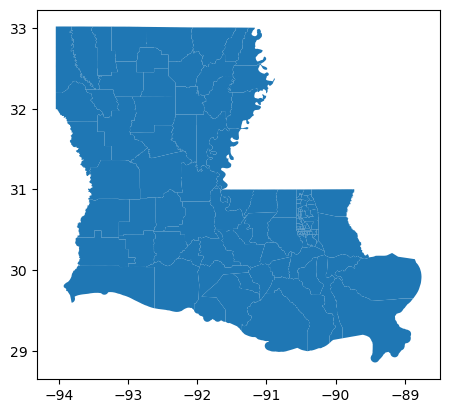

In [121]:
joined_19.plot()

<AxesSubplot: >

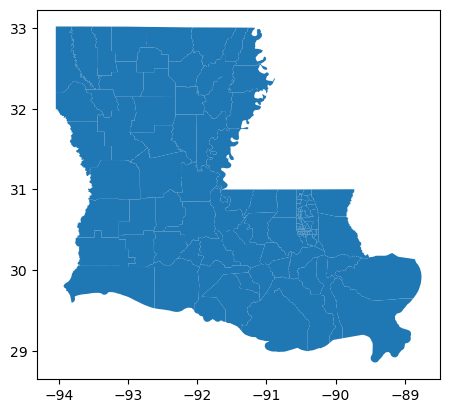

In [122]:
joined_20.plot()

<AxesSubplot: >

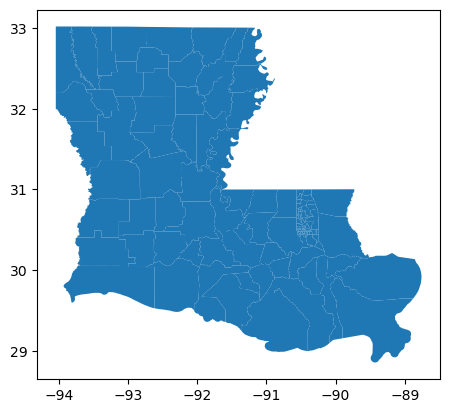

In [123]:
joined_23.plot()

In [125]:
joined_17.to_file("./joined_17/joined_17.shp")
joined_18.to_file("./joined_18/joined_18.shp")
joined_19.to_file("./joined_19/joined_19.shp")
joined_20.to_file("./joined_20/joined_20.shp")
joined_23.to_file("./joined_23/joined_23.shp")

/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/io/file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/io/file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_20137/3492533269.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  joined_18.to_file("./joined_18/joined_18.shp")
/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/io/file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the 